<a href="https://colab.research.google.com/github/gabmac/ISL/blob/main/Chapter3_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# *Chapter 3*

Exercise from Chapter 3 of ***An introduction to Statistical Learning***  by Gareth James, Daniela Witten, Trevor Hastie and Robert Tibshirani.


>Questions 5,6,7 see in https://nbviewer.jupyter.org/github/a-martyn/ISL-python/blob/master/Notebooks/ch3_linear_regression_conceptual.ipynb

# Exercises

## Conceptual

### Question 1

Describe the null hypotheses to which the p-values given in Table 3.4
correspond. Explain what conclusions you can draw based on these
p-values. Your explanation should be phrased in terms of sales, TV,
radio, and newspaper, rather than in terms of the coefficients of the
linear model.


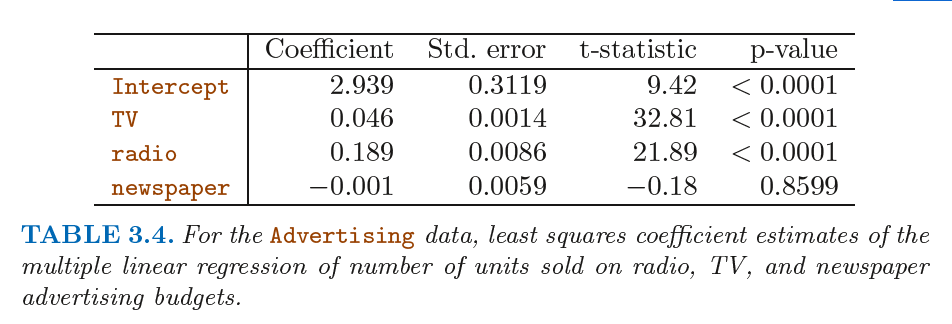

>The Null hypothesis is: There is no relationship between the amount spend in advertising, no matter if it is TV, radio or newspaper, and sales.

> The p-values suggests that there is some relationship between TV and Radio with sales, and there is no significant relationship between newspaper and sales. 

### Question 2

Carefully explain the differences between the KNN classifier and KNN regression methods.

> The KNN classifier and the KNN regression methods are largely similar. The KNN classifier determines a decision boundary which can be used to segment data into 2 or more clusters or groups. KNN regression is non-parmetric method for estimating a regression function that can be used to predict some quantitivie variable.

### Question 3

Suppose we have a data set with five predictors, X1 = GPA, X2 = IQ, X3 = Gender (1 for Female and 0 for Male), X4 = Interaction between GPA and IQ, and X5 = Interaction between GPA and Gender. The response is starting salary after graduation (in thousands of dollars). Suppose we use least squares to fit the model, and get β_0 = 50, β_1 = 20 , β_2 = 0.07 , β_3 = 35 , β_4 = 0.01 , β_5 = −10 

(a) Which answer is correct, and why?

1. For a fixed value of IQ and GPA, males earn more on average
than females.

2. For a fixed value of IQ and GPA, females earn more on
average than males.

3. For a fixed value of IQ and GPA, males earn more on average
than females provided that the GPA is high enough.

4. For a fixed value of IQ and GPA, females earn more on
average than males provided that the GPA is high enough.

> 3


(b) Predict the salary of a female with IQ of 110 and a GPA of 4.0


In [4]:
def salary(b_0,b_1,b_2,b_3,b_4,b_5,gpa,iq,gender):
  return b_0 + b_1*gpa + b_2*iq + b_3*gender + b_4*gpa*iq + b_5*gpa*gender

b_0 = 50
b_1 = 20
b_2 = 0.07
b_3 = 35
b_4 = 0.01
b_5 = -10
gpa = 4
iq = 110
gender = 1

print(salary(b_0,b_1,b_2,b_3,b_4,b_5,gpa,iq,gender)*1000)

137100.0


(c) True or false: Since the coefficient for the GPA/IQ interaction term is very small, there is very little evidence of an interaction effect. Justify your answer.

> False: if the standard error is small than the effect need to be considered.

###Question 4

I collect a set of data (n = 100 observations) containing a single predictor and a quantitative response. I then fit a linear regression model to the data, as well as a separate cubic regression, i.e.
Y = β0 + β1X + β2X^2 + β3X^3 + ε

(a) Suppose that the true relationship between X and Y is linear, i.e. Y = β0 + β1X + ε. Consider the training residual sum of squares (RSS) for the linear regression, and also the training RSS for the cubic regression. Would we expect one to be lower than the other, would we expect them to be the same, or is there not enough information to tell? Justify your answer.

>The lower RSS would be the cubic model, because it is more complex so it probably fit more closely to trainning data, causing overfitting, even though the model is truly linear

(b) Answer (a) using test rather than training RSS.

> The lower RSS would be linear model, because the data is truly linear, and cubic model probably would overfit the training data

(c) Suppose that the true relationship between X and Y is not linear, but we don’t know how far it is from linear. Consider the training RSS for the linear regression, and also the training RSS for the cubic regression. Would we expect one to be lower than the other, would we expect them to be the same, or is there not enough information to tell? Justify your answer.


>The lower RSS would be the cubic model, because it is more complex so it probably fit more closely to trainning data

(d) Answer (c) using test rather than training RSS.

>There is no enough information

##Applied